In [ ]:
# '''
# Dumping shirts and jerseys data for later usage
# '''
# import cv2
# import glob
# import numpy as np


# #__Dumping 200 manually chosen clean background shirts and jerseys__#
# path_s = '/Users/ash/Downloads/cs156_3/s_100/*JPEG'
# path_j = '/Users/ash/Downloads/cs156_3/j_100/*JPEG'

# #Using glob to iteratively parsing the files with JPEG name in a folder, glob 
# # will close the file after parsing automatically
# files_s = glob.glob(path_s)
# files_j = glob.glob(path_j)

# shirts, jerseys = np.zeros(shape=(106, 200, 200, 3)), np.zeros(shape=(109, 200, 200, 3))

# shape_0 = []
# shape_1 = []
# 
# #Reading the parsed images using OpenCV, interpolated them to be 200x200 and put them into a ndarray
# count_s = 0
# for _ in files_s:
#     img = cv2.imread(_)
#     shape_0.append(img.shape[0])
#     shape_1.append(img.shape[1])
#     dim = (200,200)
#     resized = cv2.resize(img, dim, interpolation=cv2.INTER_CUBIC)
#     shirts[count_s,:] = resized
#     count_s +=1

# #Priting out the average size of the image to see whether 200x200 interpolation is reasonable
# print('Average size of shirt images:', (np.mean(shape_0),np.mean(shape_1)))


# #Doing the same thing for jerseys
# shape_0 = []
# shape_1 = []

# count_j = 0
# for _ in files_j:
#     img = cv2.imread(_)
#     shape_0.append(img.shape[0])
#     shape_1.append(img.shape[1])
#     dim = (200,200)
#     resized = cv2.resize(img, dim, interpolation=cv2.INTER_CUBIC)
#     jerseys[count_j,:] = resized
#     count_j +=1

# print('Average size of jersey images:', (np.mean(shape_0),np.mean(shape_1)))

# #Dumping the ndarrays to local machine for future usage
# shirts.dump('/Users/ash/Downloads/cs156_3/shirts_100.data')
# jerseys.dump('/Users/ash/Downloads/cs156_3/jerseys_100.data')

# -->[O]: Average size of shirt images: (404.4622641509434, 388.4339622641509)
# Average size of jersey images: (384.42201834862385, 385.42201834862385)



# #__Choosing and dumping 2000 programatically chosen shirts and jerseys__#

# #Doing the same thing as above, just with 200 randomly chosen images instead of 100 pre-selected ones
# path_s = '/Users/ash/Downloads/cs156_3/shirt_original/*JPEG'
# path_j = '/Users/ash/Downloads/cs156_3/jersey_original/*JPEG'

# files_s = glob.glob(path_s)
# files_j = glob.glob(path_j)

# chosen_s = []
# chosen_j = []

# for _ in np.random.choice(len(files_s),size=200, replace=False):
#     chosen_s.append(files_s[_])

# for _ in np.random.choice(len(files_j),size=200, replace=False):
#     chosen_j.append(files_j[_])

# shirts, jerseys = np.zeros(shape=(200, 200, 200, 3)), np.zeros(shape=(200, 200, 200, 3))

# count_s = 0
# for _ in chosen_s:
#     img = cv2.imread(_)
#     dim = (200,200)
#     resized = cv2.resize(img, dim, interpolation=cv2.INTER_CUBIC)
#     shirts[count_s,:] = resized
#     count_s +=1

# count_j = 0
# for _ in chosen_j:
#     img = cv2.imread(_)
#     dim = (200,200)
#     resized = cv2.resize(img, dim, interpolation=cv2.INTER_CUBIC)
#     jerseys[count_j,:] = resized
#     count_j +=1

# shirts.dump('/Users/ash/Downloads/cs156_3/shirts_200.data')
# jerseys.dump('/Users/ash/Downloads/cs156_3/jerseys_200.data')

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

In [94]:
#Loading and labeling dumped images
# '''
# 200 images
# '''
# shirts = np.load('/Users/ash/Downloads/cs156_3/shirts_100.data')
# jerseys = np.load('/Users/ash/Downloads/cs156_3/jerseys_100.data')

'''
400 images
'''
shirts = np.load('/Users/ash/Downloads/cs156_3/shirts_200.data')
jerseys = np.load('/Users/ash/Downloads/cs156_3/jerseys_200.data')



data = np.concatenate((shirts,jerseys), axis=0)
data = data/255
data = data.reshape(data.shape[0], 200*200,3)
label = np.zeros(shape=(data.shape[0], 1))
label[:shirts.shape[0],:] = 1

X_train, X_test, y_train, y_test = train_test_split(data.reshape(data.shape[0], data.shape[1]*data.shape[2]),
                                                    label, test_size=0.2, random_state=25)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 120000)
(320, 1)
(80, 120000)
(80, 1)


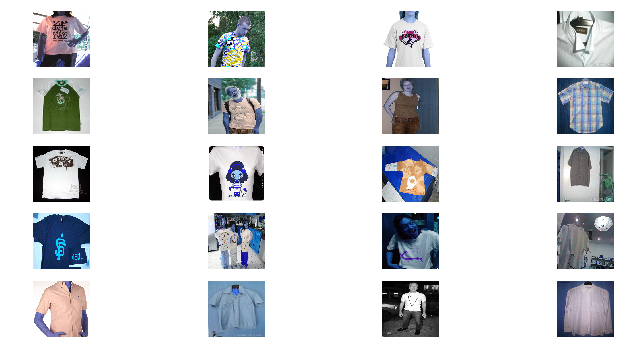

In [78]:
choices = np.random.choice(X_train.shape[0], size=20, replace=False)

count=1
plt.figure(figsize=(12,6))
for _ in choices: 
    plt.subplot(5,4,count)
    plt.imshow(X_train[_].reshape(200,200,3))
    plt.axis('off')
    count +=1
plt.show()

In [95]:
#1. Train a simple logistic regression on the unprojected data

model_1 = LogisticRegression(penalty='l2', solver='lbfgs')
accs = cross_val_score(model_1,X_train, y_train.reshape(-1,), scoring='accuracy', cv=2)

f1s = cross_val_score(model_1,X_train, y_train.reshape(-1,), scoring='f1', cv=2)

aucs = cross_val_score(model_1,X_train, y_train.reshape(-1,), scoring='roc_auc', cv=2)

print("Acc:", accs)
print("F1:", f1s)
print("ROC AUC:", aucs)

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Acc: [0.525   0.53125]
F1: [0.56321839 0.50980392]
ROC AUC: [0.5078125 0.524375 ]


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [96]:
#Fitting the model on the whole training set and evaluate its performance
model_1.fit(X_train, y_train.reshape(-1,))
preds = model_1.predict(X_train)
print('Train set accuracy:', accuracy_score(y_train, preds))
print('Train set f1:', f1_score(y_train, preds))
print('Train set ROC AUC:', roc_auc_score(y_train, preds))

print('##DIAGNOSTICS INFO##-Interations till convergence:', model_1.n_iter_)

Train set accuracy: 0.990625
Train set f1: 0.9905956112852665
Train set ROC AUC: 0.990625
##DIAGNOSTICS INFO##-Interations till convergence: [100]


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [97]:
test_preds = model_1.predict(X_test)
print('Test set accuracy:', accuracy_score(y_test, test_preds))
print('Test set f1:', f1_score(y_test, test_preds))
print('Test set ROC AUC:', roc_auc_score(y_test, test_preds))

Test set accuracy: 0.625
Test set f1: 0.6428571428571429
Test set ROC AUC: 0.625


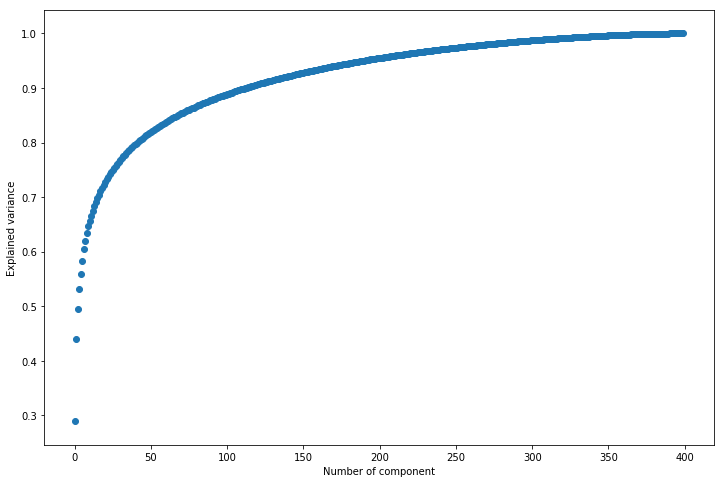

In [82]:
#2. Use PCA to choose and project data to a lower dimension, then run logistic regression 
pca_rgb = PCA(n_components=data.shape[0])
pca_rgb.fit(data.reshape(data.shape[0], data.shape[1]*data.shape[2]))
cum_sum = np.cumsum(pca_rgb.explained_variance_ratio_)

plt.figure(figsize=(12,8))
plt.scatter([_ for _ in range(data.shape[0])], cum_sum)
plt.xlabel('Number of component')
plt.ylabel('Explained variance')
plt.show()

In [98]:
print('Using 30 first components, containing %f of explained variance...' %cum_sum[30])

#Projecting the data using PCA with 30 components
pca_rgb = PCA(n_components=30)
X_train_re = pca_rgb.fit_transform(X_train)
X_test_re = pca_rgb.transform(X_test)

model_1_re = LogisticRegression(penalty='l2', solver='lbfgs')

Using 30 first components, containing 0.768372 of explained variance...


In [99]:
model_1_re.fit(X_train_re, y_train.reshape(-1,))
preds_re = model_1_re.predict(X_train_re)
print('Train set accuracy:', accuracy_score(y_train, preds_re))
print('Train set f1:', f1_score(y_train, preds_re))
print('Train set ROC AUC:', roc_auc_score(y_train, preds_re))

print('##DIAGNOSTICS INFO##-Interations till convergence:', model_1_re.n_iter_)

Train set accuracy: 0.6
Train set f1: 0.6097560975609756
Train set ROC AUC: 0.6
##DIAGNOSTICS INFO##-Interations till convergence: [41]


In [100]:
test_preds_re = model_1_re.predict(X_test_re)
print('Test set accuracy:', accuracy_score(y_test, test_preds_re))
print('Test set f1:', f1_score(y_test, test_preds_re))
print('Test set ROC AUC:', roc_auc_score(y_test, test_preds_re))

Test set accuracy: 0.575
Test set f1: 0.5853658536585366
Test set ROC AUC: 0.5750000000000001


In [54]:
train_acc, test_acc = [], []
for _ in range(1,51): 
    pca_rgb = PCA(n_components=_)
    X_train_re = pca_rgb.fit_transform(X_train)
    X_test_re = pca_rgb.transform(X_test)
    model_1_re = LogisticRegression(penalty='l2', solver='lbfgs')
    model_1_re.fit(X_train_re, y_train.reshape(-1,))
    preds_re = model_1_re.predict(X_train_re)
    train_acc.append(accuracy_score(y_train, preds_re))
    test_preds_re = model_1_re.predict(X_test_re)
    test_acc.append(accuracy_score(y_test, test_preds_re))

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda/lib/p

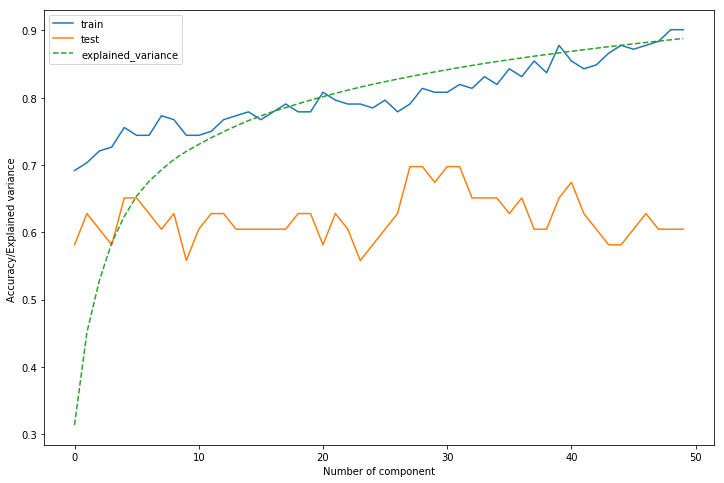

In [56]:
x = [_ for _ in range(50)]
plt.figure(figsize=(12,8))
plt.plot(x, train_acc, label='train')
plt.plot(x, test_acc, label='test' )
plt.plot(x, cum_sum[:50], label='explained_variance', linestyle='--')
plt.legend()
plt.xlabel('Number of component')
plt.ylabel('Accuracy/Explained variance ')
plt.show()

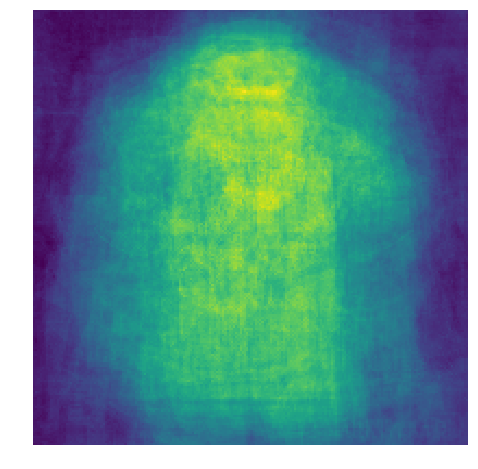

In [103]:
#2.5 Eigenshirt and eigenjersey (R,B,G and RBG)

##Shirts
plt.figure(figsize=(8,8))
decomposer_r = PCA(n_components=30)
decomposer_g = PCA(n_components=30)
decomposer_b = PCA(n_components=30)
eigen = shirts.reshape(shirts.shape[0], 200*200,3)/255
decomposer_r.fit(eigen[:,:,0])
decomposer_g.fit(eigen[:,:,1])
decomposer_b.fit(eigen[:,:,2])

plt.imshow(decomposer_r.components_[0].reshape(200,200))
plt.imshow(decomposer_g.components_[0].reshape(200,200))
plt.imshow(decomposer_b.components_[0].reshape(200,200))
plt.axis('off')
plt.show()

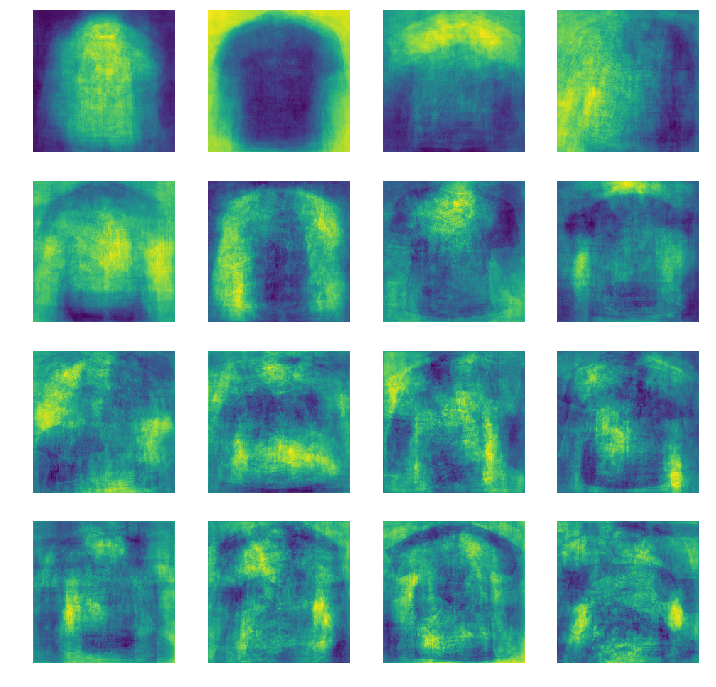

In [104]:
count = 1
plt.figure(figsize=(12,12))
for _ in range(16): 
    plt.subplot(4,4,count)
    plt.imshow(decomposer_r.components_[_].reshape(200,200))
    plt.imshow(decomposer_g.components_[_].reshape(200,200))
    plt.imshow(decomposer_b.components_[_].reshape(200,200))
    plt.axis('off')
    count+=1
plt.show()

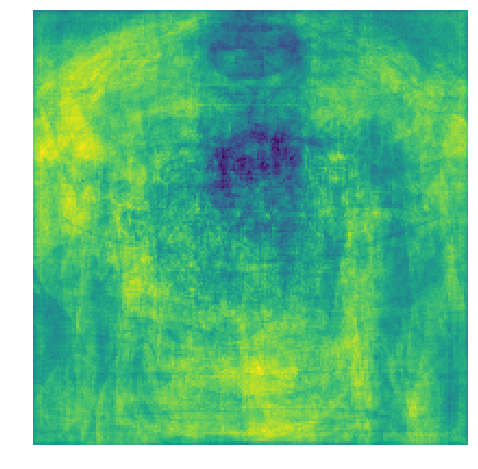

In [105]:
##Jerseys

plt.figure(figsize=(8,8))
decomposer_r = PCA(n_components=30)
decomposer_g = PCA(n_components=30)
decomposer_b = PCA(n_components=30)
eigen = jerseys.reshape(jerseys.shape[0], 200*200,3)/255
decomposer_r.fit(eigen[:,:,0])
decomposer_g.fit(eigen[:,:,1])
decomposer_b.fit(eigen[:,:,2])

plt.imshow(decomposer_r.components_[0].reshape(200,200))
plt.imshow(decomposer_g.components_[0].reshape(200,200))
plt.imshow(decomposer_b.components_[0].reshape(200,200))
plt.axis('off')
plt.show()

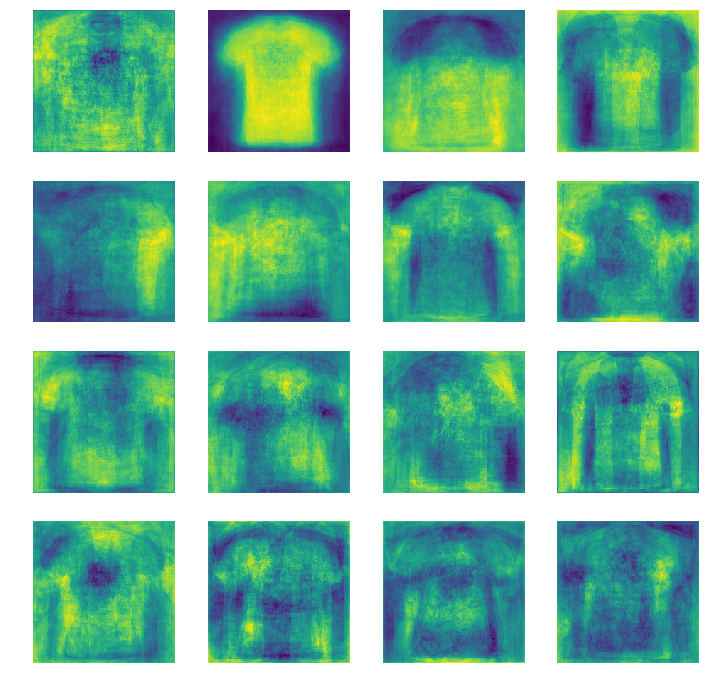

In [106]:
count = 1
plt.figure(figsize=(12,12))
for _ in range(16): 
    plt.subplot(4,4,count)
    plt.imshow(decomposer_r.components_[_].reshape(200,200))
    plt.imshow(decomposer_g.components_[_].reshape(200,200))
    plt.imshow(decomposer_b.components_[_].reshape(200,200))
    plt.axis('off')
    count+=1
plt.show()

In [101]:
#3. Use LDA to choose and project data to a lower dimension, then display the mixture model results 

lda_1 = LinearDiscriminantAnalysis() 
lda_1.fit(X_train, y_train.reshape(-1,))

/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [102]:
train_preds = lda_1.predict(X_train)
test_preds = lda_1.predict(X_test)

print('Train set accuracy:', accuracy_score(y_train, train_preds))
print('Train set f1:', f1_score(y_train, train_preds))
print('Train set ROC AUC:', roc_auc_score(y_train, train_preds))

print('Test set accuracy:', accuracy_score(y_test, test_preds))
print('Test set f1:', f1_score(y_test, test_preds))
print('Test set ROC AUC:', roc_auc_score(y_test, test_preds))

Train set accuracy: 0.990625
Train set f1: 0.9906542056074766
Train set ROC AUC: 0.990625
Test set accuracy: 0.575
Test set f1: 0.5853658536585366
Test set ROC AUC: 0.5750000000000001
